# Description:
In this notebook we test the Top2Vec package API and we do some experiments.

In [1]:
# Make sure you have a GPU running
! nvidia-smi

Fri Sep 10 23:20:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| N/A   53C    P8     7W /  N/A |   1896MiB /  5934MiB |     31%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from haystack.document_store.elasticsearch import OpenDistroElasticsearchDocumentStore
import umap
import matplotlib.pyplot as plt
from experiments.utils import Top2Vec

import warnings
warnings.filterwarnings('ignore')

09/10/2021 23:20:21 - INFO - faiss.loader -   Loading faiss with AVX2 support.
09/10/2021 23:20:21 - INFO - faiss.loader -   Loading faiss.
09/10/2021 23:20:22 - INFO - farm.modeling.prediction_head -   Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .


In [3]:
# Connect to ODElasticsearch instance (needs to be changed for security reasons)
document_store = OpenDistroElasticsearchDocumentStore(host=['0.0.0.0', 'odfe-node1'], 
                                                      username='admin', 
                                                      password='admin', 
                                                      scheme='https', 
                                                      verify_certs=False,
                                                      similarity='cosine',
                                                      return_embedding=True)
print(f"Document Store has {document_store.get_document_count()} documents.")

09/10/2021 23:20:39 - INFO - elasticsearch -   HEAD https://0.0.0.0:9200/ [status:200 request:0.496s]
09/10/2021 23:20:39 - WARNING - elasticsearch -   PUT https://odfe-node1:9200/document [status:N/A request:0.136s]
Traceback (most recent call last):
  File "/home/dsilva/miniconda3/envs/mapintel/lib/python3.7/site-packages/urllib3/connection.py", line 160, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "/home/dsilva/miniconda3/envs/mapintel/lib/python3.7/site-packages/urllib3/util/connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/home/dsilva/miniconda3/envs/mapintel/lib/python3.7/socket.py", line 752, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno -3] Temporary failure in name resolution

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/dsil

Document Store has 334925 documents.


In [4]:
# Get list of documents and categories
docs = []
categs = []
doc_gen = document_store.get_all_documents_generator(return_embedding=False)
for i, doc in enumerate(doc_gen):
    docs.append(doc.text)
    categs.append(doc.meta["category"])
    if i == 9999:
        break

09/10/2021 23:20:46 - INFO - elasticsearch -   POST https://0.0.0.0:9200/document/_search?scroll=1d&size=10000 [status:200 request:2.518s]


In [5]:
# Get dictionary of unique categories
unique_categs = set(categs)
dict_uniques = dict(zip(unique_categs, range(len(unique_categs))))

In [6]:
for i in doc_gen:
    print(i)
    break

09/10/2021 23:20:53 - INFO - elasticsearch -   POST https://0.0.0.0:9200/_search/scroll [status:200 request:2.054s]


{'text': 'CNBC Correspondent Encourages Viewers to Wear Three Masks - CBN News#SEPTAG#More is always better — I suppose, to an extent, that’s the American way. Now that philosophy is apparently spilling over into how we wear masks.#SEPTAG#More is always better I suppose, to an extent, thats the American way. Now that philosophy is apparently spilling over into how we wear masks.Speaking this week to NBCs Savannah Guthrie, Dr. Anthon', 'id': '7d96d5a4-3ae4-4f67-8593-76252c04994c', 'score': None, 'probability': None, 'question': None, 'meta': {'source': None, 'publishedat': '2021-01-30T16:43:55Z', 'url': 'https://www1.cbn.com/cbnnews/us/2021/january/cnbc-correspondent-encourages-viewers-to-wear-three-masks', 'urltoimage': 'https://www1.cbn.com/sites/default/files/styles/original/public/media/standard/images/threemask.jpeg?itok=dIkV4-07', 'category': 'health', 'umap_embeddings': [1.332824945449829, -3.5113589763641357], 'topic_number': 3, 'topic_label': '3_vaccine_covid_covid 19_19 vaccin

## Top2Vec - 5d UMAP + 2d UMAP

In [7]:
# Top2vec model - 5d UMAP
model = Top2Vec(docs, embedding_model="sentence-transformers/msmarco-distilbert-base-v4")

# Reduce the number of topics discovered by Top2Vec
model.hierarchical_topic_reduction(20)
model.get_topic_hierarchy()

2021-09-10 23:21:00,075 - top2vec - INFO - Pre-processing documents for training
2021-09-10 23:21:00,075 - top2vec - INFO - Pre-processing documents for training
09/10/2021 23:21:00 - INFO - top2vec -   Pre-processing documents for training
2021-09-10 23:21:01,959 - top2vec - INFO - Downloading sentence-transformers/msmarco-distilbert-base-v4 model
2021-09-10 23:21:01,959 - top2vec - INFO - Downloading sentence-transformers/msmarco-distilbert-base-v4 model
09/10/2021 23:21:01 - INFO - top2vec -   Downloading sentence-transformers/msmarco-distilbert-base-v4 model
09/10/2021 23:21:01 - INFO - sentence_transformers.SentenceTransformer -   Load pretrained SentenceTransformer: sentence-transformers/msmarco-distilbert-base-v4
09/10/2021 23:21:01 - INFO - sentence_transformers.SentenceTransformer -   Did not find folder sentence-transformers/msmarco-distilbert-base-v4
09/10/2021 23:21:01 - INFO - sentence_transformers.SentenceTransformer -   Search model on server: http://sbert.net/models/sen

[[43, 41, 35, 0],
 [18, 48, 33, 20, 3],
 [16, 24, 26, 46, 55, 63, 6],
 [17, 23, 60, 10],
 [29, 31, 59, 8],
 [62, 37, 4],
 [30, 50, 57, 11],
 [2],
 [21, 54, 7],
 [32, 34, 13],
 [38, 44, 56, 5],
 [42, 53, 52, 65, 66, 9],
 [1],
 [51, 14],
 [28, 36, 58, 64, 27],
 [47, 12],
 [15],
 [39, 49, 61, 22],
 [45, 25],
 [40, 19]]

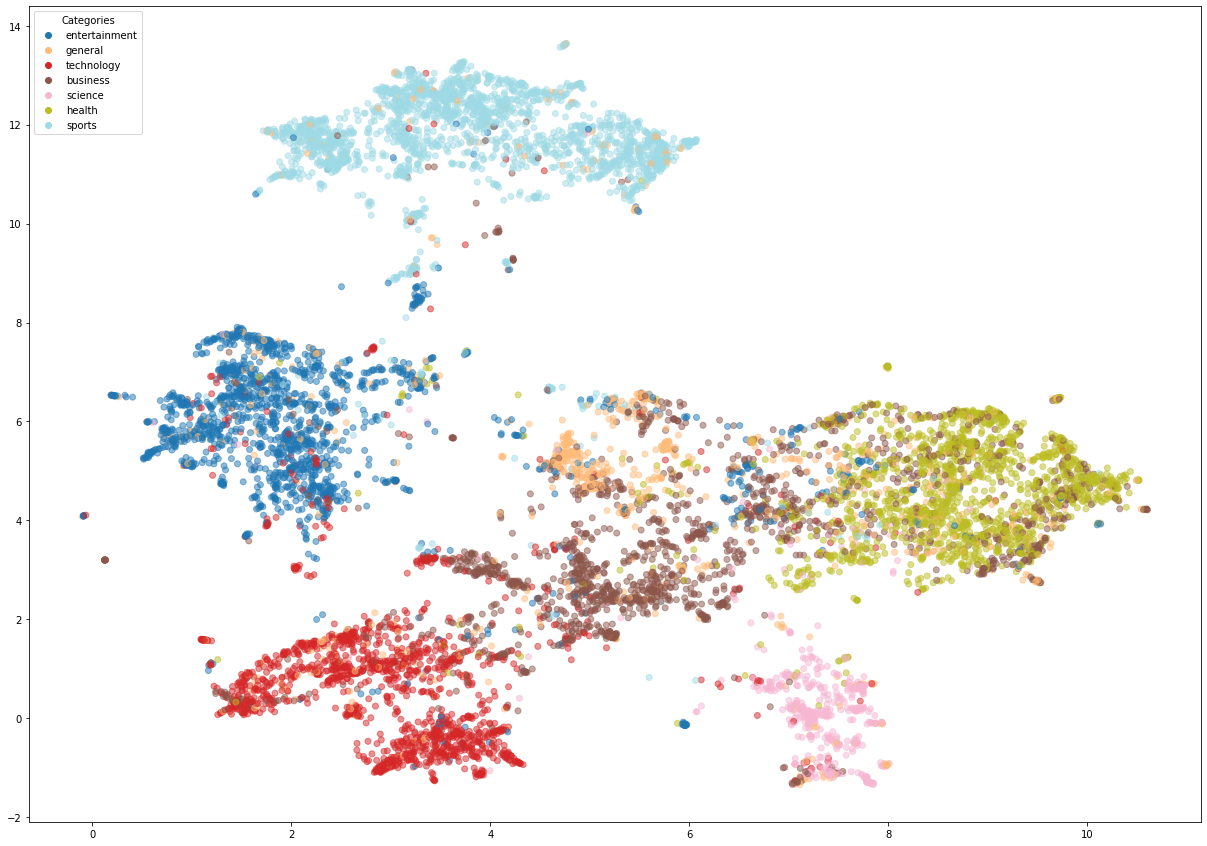

In [8]:
# Do we even need to reduce to 2 dimensions? Can we just look for the best 2D subspace?
# Reduce to 2 dimensions
umap_args = {'n_neighbors': 15,
             'n_components': 2,
             'metric': 'cosine'}
data = umap.UMAP(**umap_args).fit_transform(model.document_vectors)

# Plot 2d embeddings with category labels
fig, ax = plt.subplots(figsize=(21,15))

scatter = ax.scatter(data[:, 0], data[:, 1], alpha=0.5, c=list(map(lambda x: dict_uniques[x], categs)), cmap="tab20")

# produce a legend with the unique colors from the scatter
handles, _ = scatter.legend_elements(num=None,  alpha=1)
legend1 = ax.legend(handles, unique_categs, ncol=1, loc="upper left", title="Categories")

plt.show()

In [9]:
# Get topic words
topic_words, word_scores, topic_nums = model.get_topics(20, reduced=True)

# Produce topic labels by concatenating top 5 words
topic_labels = ["_".join(words[:5]) for words in topic_words]

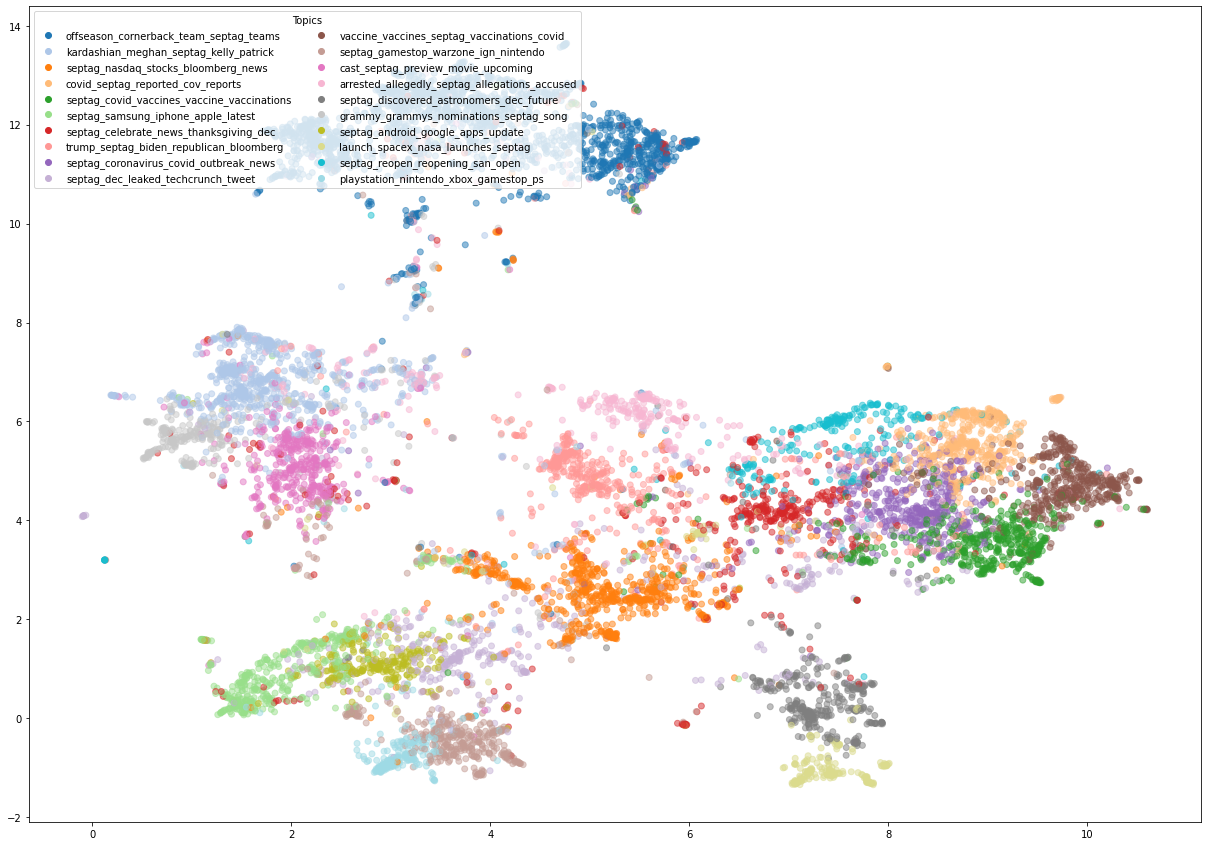

In [10]:
# Plot 2d embeddings with reduced topic labels
fig, ax = plt.subplots(figsize=(21,15))

scatter = ax.scatter(data[:, 0], data[:, 1], alpha=0.5, c=model.doc_top_reduced, cmap="tab20")

# produce a legend with the unique colors from the scatter
handles, _ = scatter.legend_elements(num=None,  alpha=1)
legend1 = ax.legend(handles, topic_labels, ncol=2, loc="upper left", title="Topics")

plt.show()

## Top2Vec - 2d UMAP

In [11]:
# Top2vec model
umap_args = {'n_neighbors': 15,
             'n_components': 2,
             'metric': 'cosine'}
model = Top2Vec(docs, embedding_model="sentence-transformers/msmarco-distilbert-base-v4", umap_args=umap_args)

# Reduce the number of topics discovered by Top2Vec
model.hierarchical_topic_reduction(20)
model.get_topic_hierarchy()

2021-09-10 23:22:07,542 - top2vec - INFO - Pre-processing documents for training
2021-09-10 23:22:07,542 - top2vec - INFO - Pre-processing documents for training
09/10/2021 23:22:07 - INFO - top2vec -   Pre-processing documents for training
2021-09-10 23:22:09,569 - top2vec - INFO - Downloading sentence-transformers/msmarco-distilbert-base-v4 model
2021-09-10 23:22:09,569 - top2vec - INFO - Downloading sentence-transformers/msmarco-distilbert-base-v4 model
09/10/2021 23:22:09 - INFO - top2vec -   Downloading sentence-transformers/msmarco-distilbert-base-v4 model
09/10/2021 23:22:09 - INFO - sentence_transformers.SentenceTransformer -   Load pretrained SentenceTransformer: sentence-transformers/msmarco-distilbert-base-v4
09/10/2021 23:22:09 - INFO - sentence_transformers.SentenceTransformer -   Did not find folder sentence-transformers/msmarco-distilbert-base-v4
09/10/2021 23:22:09 - INFO - sentence_transformers.SentenceTransformer -   Search model on server: http://sbert.net/models/sen

[[39, 0],
 [40, 43, 66, 1],
 [42, 25, 16, 49, 41, 29, 52, 57, 63, 5],
 [14, 69, 70, 3],
 [53, 60, 33, 59, 38, 47, 45, 22, 37, 61, 30],
 [15, 4],
 [34, 55, 64, 7],
 [2],
 [10],
 [35, 6],
 [20, 46, 48, 62, 28],
 [44, 67, 8],
 [17, 65, 50, 68, 13],
 [27, 26, 9],
 [51, 32, 36, 24],
 [56, 11],
 [23, 19],
 [12],
 [31, 21],
 [54, 58, 18]]

In [12]:
model.get_hdbscan_cluster().labels_

array([ 4,  4, 48, ..., -1,  2, 17])

In [13]:
model.topic_vectors.shape

(71, 768)

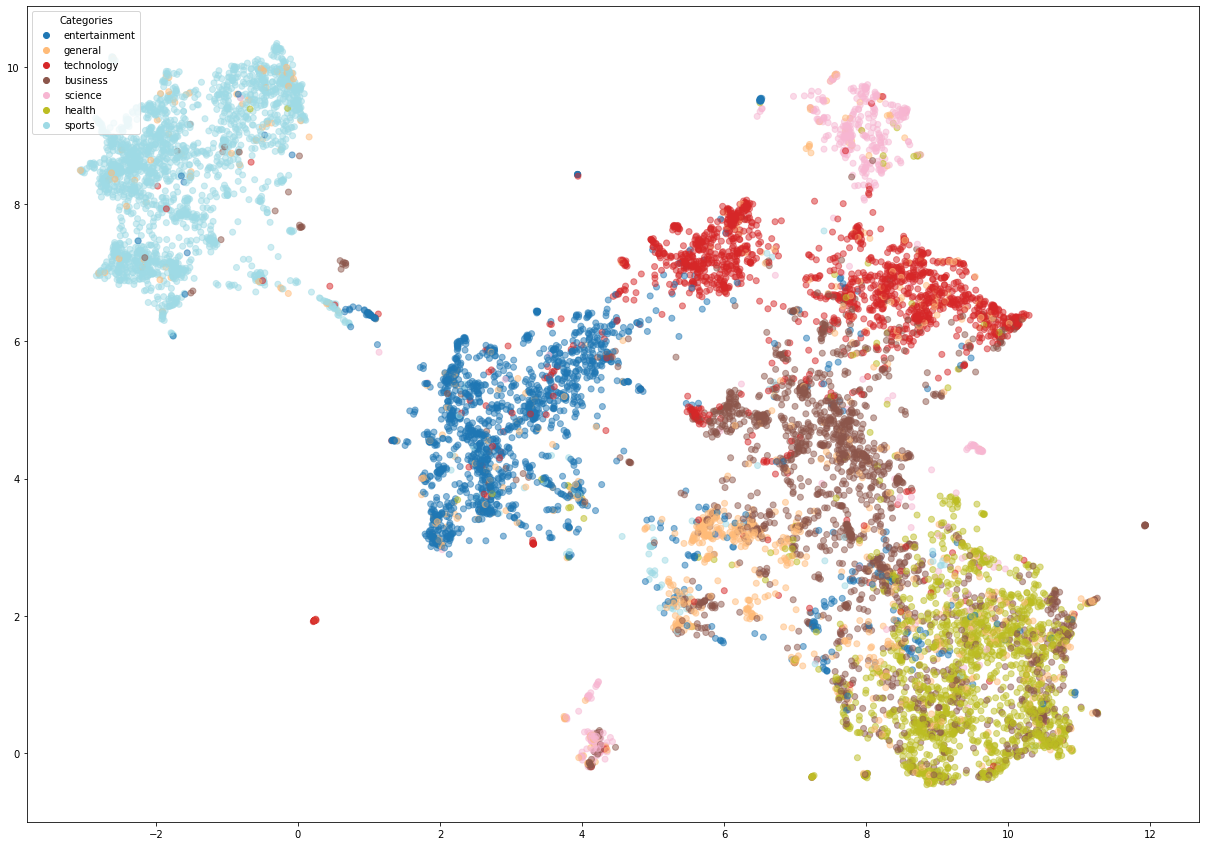

In [14]:
# Plot 2d embeddings with category labels
data = model.get_umap().embedding_

fig, ax = plt.subplots(figsize=(21,15))

scatter = ax.scatter(data[:, 0], data[:, 1], alpha=0.5, c=list(map(lambda x: dict_uniques[x], categs)), cmap="tab20")

# produce a legend with the unique colors from the scatter
handles, _ = scatter.legend_elements(num=None,  alpha=1)
legend1 = ax.legend(handles, unique_categs, ncol=1, loc="upper left", title="Categories")

plt.show()

In [15]:
# Get topic words
topic_words, word_scores, topic_nums = model.get_topics(20, reduced=True)

# Produce topic labels by concatenating top 5 words
topic_labels = ["_".join(words[:5]) for words in topic_words]

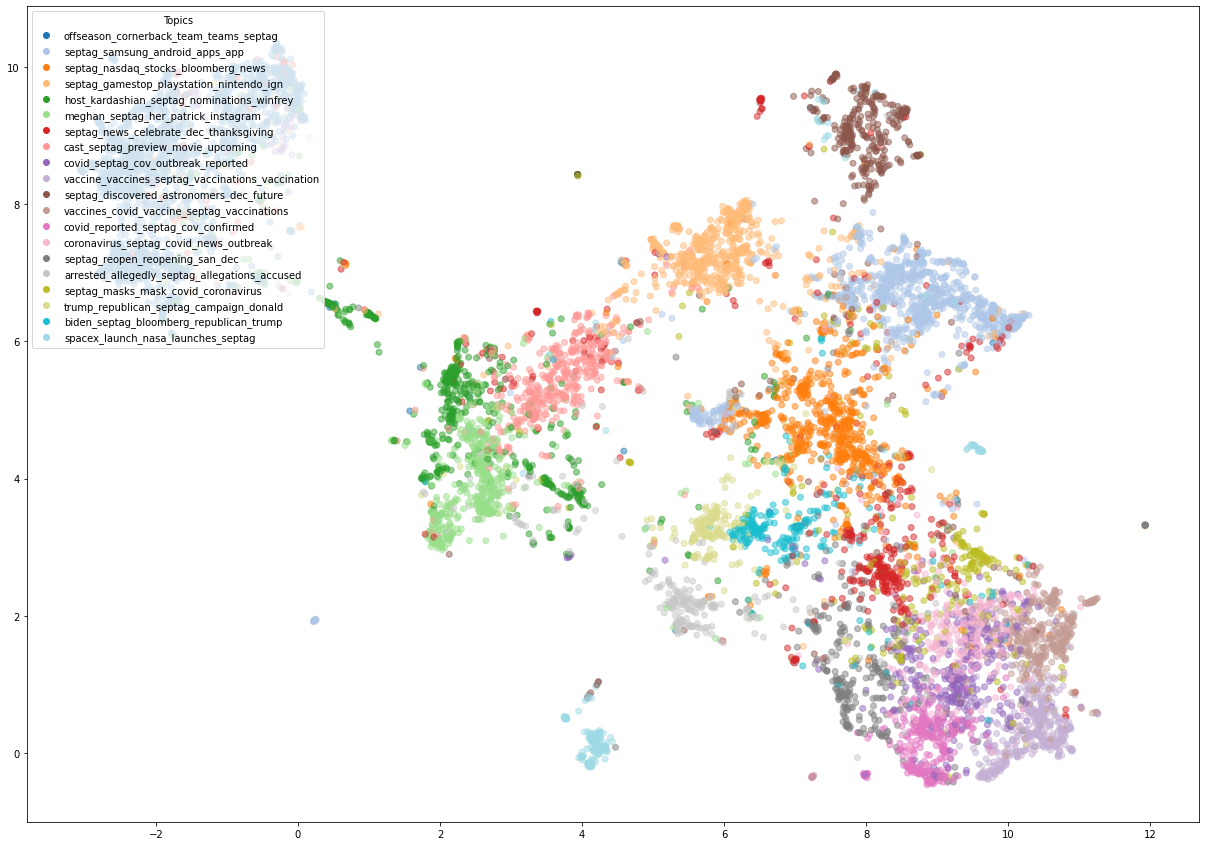

In [16]:
# Plot 2d embeddings with reduced topic labels
fig, ax = plt.subplots(figsize=(21,15))

scatter = ax.scatter(data[:, 0], data[:, 1], alpha=0.5, c=model.doc_top_reduced, cmap="tab20")

# produce a legend with the unique colors from the scatter
handles, _ = scatter.legend_elements(num=None,  alpha=1)
legend1 = ax.legend(handles, topic_labels, ncol=1, loc="upper left", title="Topics")

plt.show()

### Some conclusions from the previous sections:
- Top2Vec on 5 dimensions might achieve better topics than on 2 dimensions, however it comes with the cost of not being visualized. To solve this we can further reduce the space to 2 dimensions (the results weren't good) or we can look for a 2 dimensional subspace that represents the data well (i.e. has good separation between clusters).


## Exploring Top2Vec API

In [17]:
# How many topics there are?
num_topics = model.get_num_topics()
num_topics

71

In [18]:
# What are the topics about?
topic_words, word_scores, topic_nums = model.get_topics(num_topics)

In [19]:
topic_words

array([['offseason', 'cornerback', 'septag', ..., 'alex', 'lakers',
        'madison'],
       ['septag', 'samsung', 'apps', ..., 'amazon', 'developers',
        'reviews'],
       ['cast', 'septag', 'preview', ..., 'canceled', 'debut', 'sarah'],
       ...,
       ['michigan', 'coronavirus', 'reported', ..., 'march', 'leaked',
        'journal'],
       ['fortnite', 'septag', 'nov', ..., 'tiktok', 'revealed', 'sixers'],
       ['septag', 'gamestop', 'game', ..., 'packers', 'last', 'save']],
      dtype='<U14')

In [20]:
# Search topics based on a keyword
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["apple"], num_topics=5)

In [21]:
topic_nums

array([ 1, 66, 43, 25, 40])

In [22]:
# Search documents by topic 3
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=3, num_docs=5)

In [23]:
documents

array(['Best PS5 launch games for the DualSense controller - Polygon#SEPTAG#If you want to see all the functionality of the PlayStation 5’s DualSense controller, here are the games you’ll want to try out, from Call of Duty to Demon’s Souls.#SEPTAG#Before the launch of the PlayStation 5, I knew that its new controller would have some fancy technology built in. But it wasnt until I had a chance to play with DualSense controllers that I realized ',
       "Go grab 100 easy My Nintendo Platinum Points with the new Zelda missions - Destructoid#SEPTAG#Go grab 100 easy My Nintendo Platinum Points with the new Zelda missions#SEPTAG#It only takes a few minutesHyrule Warriors: Age of Calamity\xa0is out on Switch, and it just got a day one patch. It's time to play it. Or, you can play the game away from the game. Nintendo has been ",
       'DOOM Running On The Nintendo Game & Watch - Hackaday#SEPTAG#Today the newly-released Nintendo Game & Watch can play DOOM. Sure, there are caveatsthis is a wa

In [24]:
# Semantic search of documents using keywords
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["Apple"], num_docs=5)

In [25]:
document_ids

array([6002, 7222, 6128, 4217, 4015])

In [26]:
documents

array(['2021 iPad Pro Case Found at Target as Rumors Swirl About Upcoming Refresh - MacRumors#SEPTAG#With rumors swirling about an upcoming iPad Pro refresh, which may be announced as part of an alleged Apple Event on Tuesday, March 23, it appears...#SEPTAG#With rumors swirling about an upcoming iPad Pro refresh, which may be announced as part of an alleged Apple Event on Tuesday, March 23, it appears that at least one accessory maker has already starte',
       "An Apple Watch for kids is the perfect way to keep the Series 3 alive - Macworld#SEPTAG#How Apple could offer a killer Watch for kids by stealing a few of Fitbit's ideas.#SEPTAG#If youre looking for a tracker that will motivate your kids to exercise, there are precious few options. One, really: The Fitbit Ace 3. It arrived this week for $80 and comes in a kid-friendly case w",
       'Apple Set to Begin iPhone 12 Production in India - MacRumors#SEPTAG#Apple will soon start flagship iPhone 12 production on Indian soil for local

In [27]:
# Get document topics - 376 talks about Appple M1 Mac
model.get_documents_topics([376])

(array([59]),
 array([0.6563874], dtype=float32),
 array([['host', 'brady', 'kardashian', 'episode', 'chris', 'justin',
         'alex', 'brian', 'jim', 'kyle', 'show', 'cast', 'tonight',
         'rumors', 'offseason', 'exclusive', 'jennifer', 'trump',
         'winfrey', 'matt', 'kelly', 'espn', 'davis', 'patrick',
         'announced', 'tim', 'interview', 'tom', 'leaving', 'canceled',
         'ryan', 'finale', 'returning', 'champion', 'confirmed',
         'upcoming', 'challenge', 'cornerback', 'nbc', 'sixers', 'queen',
         'champions', 'hong', 'meghan', 'viewers', 'reporter',
         'suspended', 'ben', 'instagram', 'revealed']], dtype='<U14'),
 array([[0.38849786, 0.3151174 , 0.27134734, 0.25937477, 0.24492294,
         0.2442283 , 0.23980707, 0.23883262, 0.23833606, 0.22960186,
         0.22742891, 0.22437921, 0.21954644, 0.21726865, 0.21634227,
         0.21414798, 0.2106998 , 0.20929867, 0.2087019 , 0.20346206,
         0.1990168 , 0.19893286, 0.1925731 , 0.19011575, 0.1

In [28]:
# Reduce the number of topics discovered by Top2Vec.
model.hierarchical_topic_reduction(20)
model.get_topic_hierarchy()

[[39, 0],
 [40, 43, 66, 1],
 [42, 25, 16, 49, 41, 29, 52, 57, 63, 5],
 [14, 69, 70, 3],
 [53, 60, 33, 59, 38, 47, 45, 22, 37, 61, 30],
 [15, 4],
 [34, 55, 64, 7],
 [2],
 [10],
 [35, 6],
 [20, 46, 48, 62, 28],
 [44, 67, 8],
 [17, 65, 50, 68, 13],
 [27, 26, 9],
 [51, 32, 36, 24],
 [56, 11],
 [23, 19],
 [12],
 [31, 21],
 [54, 58, 18]]

In [29]:
# What are the topics about?
topic_words, word_scores, topic_nums = model.get_topics(num_topics)

In [30]:
topic_words[[68, 17, 32, 59, 69, 4]]

array([['michigan', 'coronavirus', 'reported', 'reports', 'septag',
        'confirmed', 'news', 'detroit', 'outbreak', 'investigation',
        'cases', 'report', 'dec', 'reporting', 'ford', 'tweet',
        'reporter', 'case', 'commission', 'nov', 'updates', 'deaths',
        'project', 'rumors', 'court', 'covid', 'center', 'centers',
        'cov', 'filed', 'gm', 'missed', 'sars', 'cryptocurrency',
        'pregnant', 'polygon', 'launches', 'vaccinated', 'sources',
        'announced', 'wandavision', 'virus', 'bay', 'toll', 'february',
        'stories', 'central', 'march', 'leaked', 'journal'],
       ['covid', 'cov', 'county', 'counties', 'reported', 'septag',
        'reports', 'confirmed', 'outbreak', 'reporting', 'coronavirus',
        'co', 'report', 'results', 'reporter', 'cases', 'news', 'recent',
        'rumors', 'dec', 'investigation', 'september', 'nov', 'nvidia',
        'shared', 'previous', 'cdc', 'cbs', 'agreed', 'infected',
        'posted', 'tournament', 'filed', '

In [31]:
# Semantic search of documents using a query
# model.query_documents("Apple", 5)

In [32]:
# Accessing the document vectors.
model.document_vectors

array([[-0.02500388, -0.00906613, -0.06392922, ...,  0.06589037,
         0.04125417, -0.02242969],
       [-0.01819257,  0.00470851, -0.00633735, ...,  0.00690096,
         0.04291957, -0.01200025],
       [ 0.02091302, -0.00933213, -0.01125824, ..., -0.00870249,
         0.03735814, -0.03230576],
       ...,
       [-0.00721944, -0.00289374,  0.03057434, ..., -0.0280343 ,
         0.04155492, -0.06570312],
       [-0.04972816, -0.01787986,  0.00505119, ...,  0.01867249,
         0.10465853, -0.07978313],
       [-0.00711447,  0.0277323 ,  0.02591873, ...,  0.0620449 ,
         0.04689655, -0.02100045]], dtype=float32)

In [33]:
model._get_document_vectors()

array([[-0.02500388, -0.00906613, -0.06392922, ...,  0.06589037,
         0.04125417, -0.02242969],
       [-0.01819257,  0.00470851, -0.00633735, ...,  0.00690096,
         0.04291957, -0.01200025],
       [ 0.02091302, -0.00933213, -0.01125824, ..., -0.00870249,
         0.03735814, -0.03230576],
       ...,
       [-0.00721944, -0.00289374,  0.03057434, ..., -0.0280343 ,
         0.04155492, -0.06570312],
       [-0.04972816, -0.01787986,  0.00505119, ...,  0.01867249,
         0.10465853, -0.07978313],
       [-0.00711447,  0.0277323 ,  0.02591873, ...,  0.0620449 ,
         0.04689655, -0.02100045]], dtype=float32)

In [34]:
# Topic assignment
model.doc_top

array([ 0,  0, 40, ..., 18, 18, 28])

In [35]:
# Reduced topics assignment (after hierarchical reduction)
model.doc_top_reduced

array([14,  0,  4, ..., 19, 19, 10])